<h1> Assignment 8
<h1> Name & Z-ID 
<h3> Daniel Bendik
<h3> z1938845
<h3> CSCI 490
<h3> Dr. Maoyuan Sun

<h1> Maximum Combat Power

In [149]:
import pandas as pd

url = "https://faculty.cs.niu.edu/~dakoop/cs503-2023sp/a5/pokemon.json"
df = pd.read_json(url)

# Calculate Attack, Defense, Stamina, and MaxCP
df['Attack'] = 2 * ((df['attack']**0.5 * df['sp_attack']**0.5 + df['speed']**0.5).round())
df['Defense'] = 2 * ((df['defense']**0.5 * df['sp_defense']**0.5 + df['speed']**0.5).round())
df['Stamina'] = 2 * df['hp']

# Add MaxCP as a new column to the dataframe
df['MaxCP'] = ((df['Attack'] + 15) * ((df['Defense'] + 15)**0.5) * ((df['Stamina'] + 15)**0.5) * 0.7903001**2) / 10

# Find pokemon with biggest combat power
result = df.loc[df.groupby('generation')['MaxCP'].idxmax()]

print(result[['name', 'generation', 'MaxCP']])

                        name  generation        MaxCP
189            Mega Mewtwo X           1  5490.480903
295           Mega Tyranitar           2  4464.706056
458            Mega Rayquaza           3  5725.850606
526            Mega Garchomp           4  4720.455236
749             Black Kyurem           5  4895.570422
835   Zygarde Complete Forme           6  4669.483338
930           Ultra Necrozma           7  5091.398806
1027     Eternatus Eternamax           8  9186.088759


<h1> Primary Types and Attack, Defense, & Speed 

<h3> Bar Chart

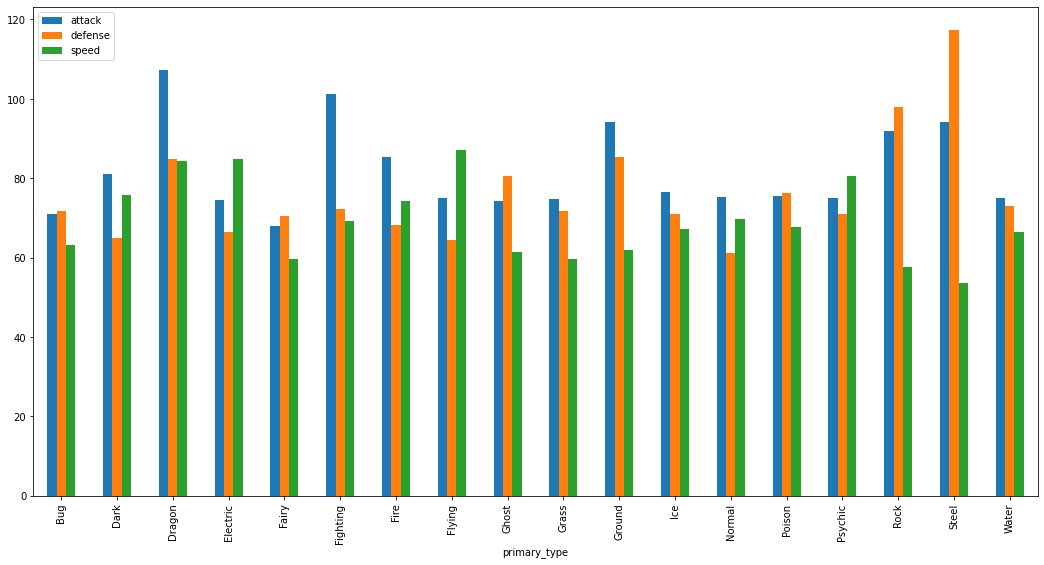

In [150]:
import matplotlib.pyplot as plt

# Calculate avergage attack, defense, and speed for each primary type
avg_stats = df.groupby('primary_type')[['attack', 'defense', 'speed']].mean()

# Bar chart
bar = avg_stats.plot(kind='bar', figsize=(18, 9))
bar.legend()

# Display the bar graph
plt.show()

<h3> Scatterplot

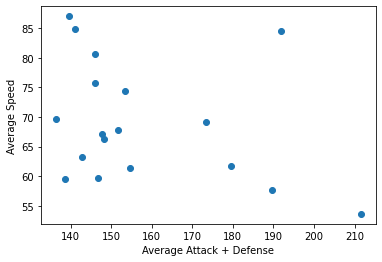

In [151]:
import matplotlib.pyplot as plt

# Calculate avergage attack, defense, and speed for each primary type
avg_stats = df.groupby('primary_type')[['attack', 'defense', 'speed']].mean()

# Add the attack and defense averages together
avg_stats['atk_and_def'] = avg_stats['attack'] + avg_stats['defense']

# Scatterplot
plt.scatter(avg_stats['atk_and_def'], avg_stats['speed'])
plt.xlabel('Average Attack + Defense')
plt.ylabel('Average Speed')

# Display the scatterplot
plt.show()

<h3> Interactive Scatter Matrix (I can't figure this out because all my charts are the same)

In [152]:
import altair as alt

# Calculate avergage attack, defense, and speed for each primary type
mean_stats = df.groupby('primary_type')[['attack', 'defense', 'speed']].mean().reset_index()

# Melt the DataFrame to long format
melted_mean_stats = mean_stats.melt(id_vars=['primary_type'], value_vars=['attack', 'defense', 'speed'], var_name='attribute', value_name='value')

# Define the interactive brush
brush = alt.selection(type='interval', resolve='global')

# Create the scatter matrix using Altair's repeat operator
scatter_matrix = alt.Chart(melted_mean_stats).mark_circle().encode(
    x=alt.X('value:Q'),
    y=alt.Y('value:Q'),
    color=alt.condition(brush, 'primary_type:N', alt.value('lightgray')),
    tooltip=['primary_type', 'attribute']
).properties(
    width=150,
    height=150
).add_selection(
    brush
).repeat(
    row=['attack', 'defense', 'speed'],
    column=['speed', 'attack', 'defense']
)

scatter_matrix

alt.RepeatChart(...)

<h3> Attack and Speed comparison (Testing purposes)

In [153]:
import altair as alt

mean_stats = df.groupby('primary_type')[['attack', 'defense', 'speed']].mean().reset_index()

# Create a scatterplot comparing attack and speed
scatterplot = alt.Chart(mean_stats).mark_circle().encode(
    x=alt.X('attack:Q', title='Attack', scale=alt.Scale(domain=(65, 110))), 
    y=alt.Y('speed:Q', title='Speed', scale=alt.Scale(domain=(50, 90))),
    color='primary_type:N',
    tooltip=['primary_type']
)

scatterplot

alt.Chart(...)

<h1> Attack-Defense Distribution

In [155]:
import altair as alt

bubble_chart = alt.Chart(df).mark_circle().encode(
    x=alt.X('attack:Q', title='attack'),
    y=alt.Y('defense:Q', title='defense'),
    size=alt.Size('speed:Q', title='speed'),
    color=alt.Color('generation:O', title='generation', scale=alt.Scale(scheme='tableau10')),  # this is the color used in example, lol
    tooltip=['name', 'generation', 'primary_type', 'attack', 'defense', 'speed']
).properties(
    width=600,
    height=400
)

bubble_chart

alt.Chart(...)